# Prédire la population de chaque pays

Le jeu de données est issu des données de la banque mondiale : évolution de la population mondiale, pays par pays depuis 1960 : https://data.worldbank.org/indicator/SP.POP.TOTL

Pour les pays dont la croissance est monotone, on peut réaliser une régression linéaire et classer les pays par catégorie.

Cet exercice est dans une démarche d'exploration des données.

### Récupération des données

In [1]:
!wget http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv \
    -O ../../data/raw/API_SP.POP.TOTL_DS2_en_csv_v2_566132.zip

--2020-01-23 14:44:41--  http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv
Resolving api.worldbank.org (api.worldbank.org)... 52.202.61.229
Connecting to api.worldbank.org (api.worldbank.org)|52.202.61.229|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78909 (77K) [application/zip]
Saving to: ‘../../data/raw/API_SP.POP.TOTL_DS2_en_csv_v2_566132.zip’

../../data/raw/API_ 100%[===================>]  77.06K   502KB/s    in 0.2s    

2020-01-23 14:44:42 (502 KB/s) - ‘../../data/raw/API_SP.POP.TOTL_DS2_en_csv_v2_566132.zip’ saved [78909/78909]



In [2]:
!cd ../../data/raw/ && unzip API_SP.POP.TOTL_DS2_en_csv_v2_566132.zip

Archive:  API_SP.POP.TOTL_DS2_en_csv_v2_566132.zip
  inflating: Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_713131.csv  
  inflating: API_SP.POP.TOTL_DS2_en_csv_v2_713131.csv  
  inflating: Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_713131.csv  


In [4]:
import pandas
from matplotlib import pyplot as plt

In [5]:
world_population_notindexed = pandas.read_csv("../../data/raw/API_SP.POP.TOTL_DS2_en_csv_v2_713131.csv", skiprows=4)

## Exercice

### Extraire les données et les traiter

- Retirer les colonnes non indispensables
- indexer par pays

Afficher les **colonnes** qu'il y a dans la dataframe "world_population_unindexed"

In [10]:
world_population_notindexed.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', 'Unnamed: 64'],
      dtype='object')

Enlever les colonnes qui ne servent à rien

In [13]:
world_population.drop(["Country Code", "Indicator Name", "Indicator Code"], axis=1, inplace=True)

In [14]:
world_population

1960        1961        1962        1963        1964  \
Country Name                                                               
Aruba            54211.0     55438.0     56225.0     56695.0     57032.0   
Afghanistan    8996973.0   9169410.0   9351441.0   9543205.0   9744781.0   
Angola         5454933.0   5531472.0   5608539.0   5679458.0   5735044.0   
Albania        1608800.0   1659800.0   1711319.0   1762621.0   1814135.0   
Andorra          13411.0     14375.0     15370.0     16412.0     17469.0   
...                  ...         ...         ...         ...         ...   
Kosovo          947000.0    966000.0    994000.0   1022000.0   1050000.0   
Yemen, Rep.    5315355.0   5393036.0   5473671.0   5556766.0   5641597.0   
South Africa  17099840.0  17524533.0  17965725.0  18423161.0  18896307.0   
Zambia         3070776.0   3164329.0   3260650.0   3360104.0   3463213.0   
Zimbabwe       3776681.0   3905034.0   4039201.0   4178726.0   4322861.0   

                    1965        1966        1967        1968        1969  ...  \
Country Name                                                              ...   
Aruba            57360.0     57715.0     58055.0     58386.0     58726.0  ...   
Afghanistan    9956320.0  10174836.0  10399926.0  10637063.0  10893776.0  ...   
Angola         5770570.0   5781214.0   5774243.0   5771652.0   5803254.0  ...   
Albania        1864791.0   1914573.0   1965598.0   2022272.0   2081695.0  ...   
Andorra          18549.0     19647.0     20758.0     21890.0     23058.0  ...   
...                  ...         ...         ...         ...         ...  ...   
Kosovo         1078000.0   1106000.0   1135000.0   1163000.0   1191000.0  ...   
Yemen, Rep.    5727751.0   5816247.0   5907874.0   6001852.0   6097035.0  ...   
South Africa  19384841.0  19888250.0  20406864.0  20942145.0  21496075.0  ...   
Zambia         3570464.0   3681955.0   3797873.0   3918872.0   4045740.0  ...   
Zimbabwe       4471177.0   4623351.0   4779827.0   4941906.0   5111337.0  ...   

                    2011        2012        2013        2014        2015  \
Country Name                                                               
Aruba           102046.0    102560.0    103159.0    103774.0    104341.0   
Afghanistan   30117413.0  31161376.0  32269589.0  33370794.0  34413603.0   
Angola        24220661.0  25107931.0  26015780.0  26941779.0  27884381.0   
Albania        2905195.0   2900401.0   2895092.0   2889104.0   2880703.0   
Andorra          83747.0     82427.0     80774.0     79213.0     78011.0   
...                  ...         ...         ...         ...         ...   
Kosovo         1791000.0   1805200.0   1824100.0   1821800.0   1801800.0   
Yemen, Rep.   23807588.0  24473178.0  25147109.0  25823485.0  26497889.0   
South Africa  52004172.0  52834005.0  53689236.0  54545991.0  55386367.0   
Zambia        14023193.0  14465121.0  14926504.0  15399753.0  15879361.0   
Zimbabwe      12894316.0  13115131.0  13350356.0  13586681.0  13814629.0   

                    2016        2017        2018  2019  Unnamed: 64  
Country Name                                                         
Aruba           104872.0    105366.0    105845.0   NaN          NaN  
Afghanistan   35383128.0  36296400.0  37172386.0   NaN          NaN  
Angola        28842484.0  29816748.0  30809762.0   NaN          NaN  
Albania        2876101.0   2873457.0   2866376.0   NaN          NaN  
Andorra          77297.0     77001.0     77006.0   NaN          NaN  
...                  ...         ...         ...   ...          ...  
Kosovo         1816200.0   1830700.0   1845300.0   NaN          NaN  
Yemen, Rep.   27168210.0  27834821.0  28498687.0   NaN          NaN  
South Africa  56203654.0  57000451.0  57779622.0   NaN          NaN  
Zambia        16363507.0  16853688.0  17351822.0   NaN          NaN  
Zimbabwe      14030390.0  14236745.0  14439018.0   NaN          NaN  

[264 rows x 61 columns]

### Visualiser les données

- présenter l'évolution de la population pour un pays
- présenter l'évolution de la population pour un groupe de pays sur le même graphique
- présenter l'évolution de la population pour un groupe de pays sur des graphiques en grille

Trier avec un seul pays

In [15]:
world_population.loc["Sweden"]

1960            7484656.0
1961            7519998.0
1962            7561588.0
1963            7604328.0
1964            7661354.0
                  ...    
2016            9923085.0
2017           10057698.0
2018           10183175.0
2019                  NaN
Unnamed: 64           NaN
Name: Sweden, Length: 61, dtype: float64

In [19]:
sweden_pop = world_population.loc["Sweden"]

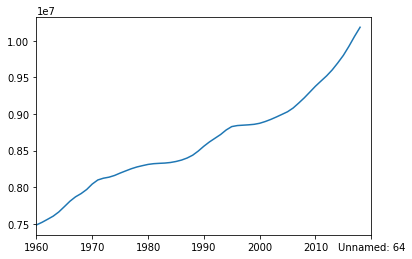

In [20]:
sweden_pop.plot()

In [24]:
nb_countries_to_plot = len(world_population)
nb_countries_to_plot = 4

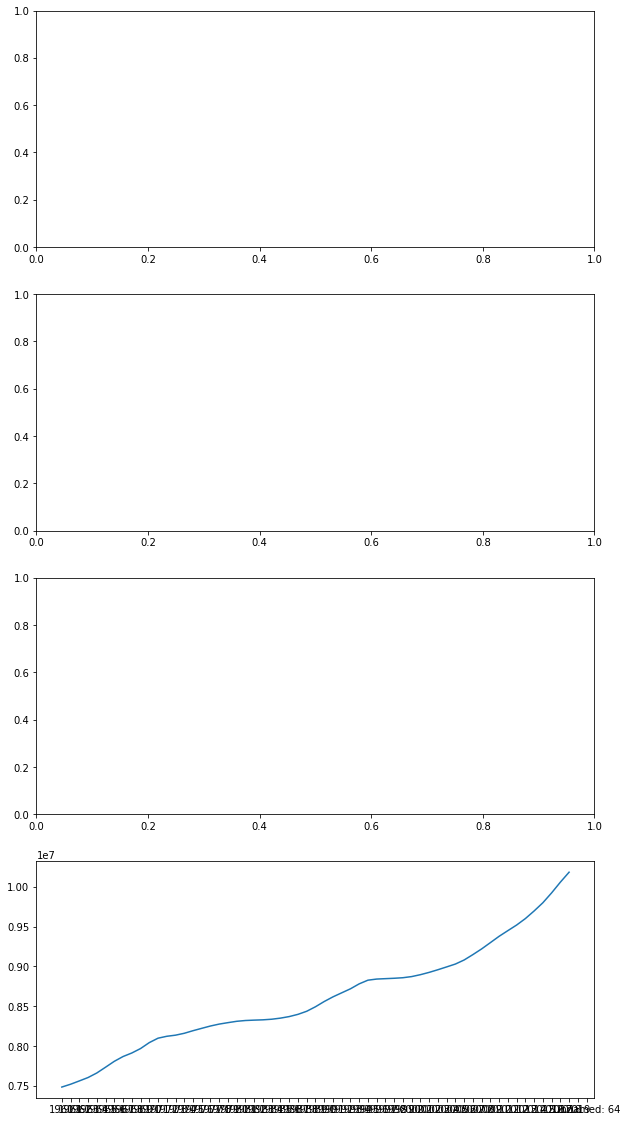

In [27]:
fig, ax = plt.subplots(nb_countries_to_plot, figsize=(10,20))

ax[0] = plt.plot(sweden_pop.index, sweden_pop)


In [18]:
world_population.index

Index(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra', 'Arab World',
       'United Arab Emirates', 'Argentina', 'Armenia', 'American Samoa',
       ...
       'Virgin Islands (U.S.)', 'Vietnam', 'Vanuatu', 'World', 'Samoa',
       'Kosovo', 'Yemen, Rep.', 'South Africa', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country Name', length=264)

### Réaliser une régression linéaire sur l'évolution de la population de la Suède

- ajuster une régression linéaire sur l'évolution de la population de la Suède (Sweden)
- écrire une fonction qui écrit réalise cette régression linéaire sur tous les pays

### Extraire les coefficients de la régression linéaire dans une dataframe

### Réaliser un clustering des pays par rapport à leur coefficient de croissance relatif à la population totale

## Étude d'un second jeu de données

Un jeu de données sur différents pays du monde est mis à disposition sur la plateforme Kaggle.

À noter qu'il faut créer un compte pour pouvoir télécharger ces données. Ces données sont déjà disponibles dans le répertoire data-public.

https://www.kaggle.com/fernandol/countries-of-the-world#countries%20of%20the%20world.csv


## Exercice : reproduire en Python l'analyse suivante (en R)

https://rpubs.com/aphalin11/clust_country